In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# modeling
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,roc_curve,roc_auc_score
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./imdb_data.csv')
df

,Title,Title_URL,Image,listeritemimage_URL,listeritemindex,Year,certificate,Time,genre,Rating,Score,Synopsis,Content,Director,Content4,Content6,Content8,Content10,Votes,Gross
0,Avatar: The Way of Water,https://www.imdb.com/title/tt1630029/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BYjhiNj...,https://www.imdb.com/title/tt1630029/?ref_=adv...,1.,(2022),12A,192 min,"\nAction, Adventure, Fantasy",7.8,\n67 \n Metascore\n,\nJake Sully lives with his newfound family fo...,\n Director:\nJames Cameron\n ...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"280,707",NaN
1,The Menu,https://www.imdb.com/title/tt9764362/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMzdjNj...,https://www.imdb.com/title/tt9764362/?ref_=adv...,2.,(2022),15,107 min,"\nHorror, Thriller",7.2,\n71 \n Metascore\n,\nA young couple travels to a remote island to...,\n Director:\nMark Mylod\n ...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"211,749",NaN
2,Babylon,https://www.imdb.com/title/tt10640346/?ref_=ad...,https://m.media-amazon.com/images/M/MV5BNjlkYj...,https://www.imdb.com/title/tt10640346/?ref_=ad...,3.,(I) (2022),18,189 min,"\nComedy, Drama, History",7.5,\n60 \n Metascore\n,\nA tale of outsized ambition and outrageous e...,\n Director:\nDamien Chazelle\n ...,Damien Chazelle,Brad Pitt,Margot Robbie,Jean Smart,Olivia Wilde,"47,754",NaN
3,Everything Everywhere All at Once,https://www.imdb.com/title/tt6710474/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt6710474/?ref_=adv...,4.,(2022),15,139 min,"\nAction, Adventure, Comedy",8.0,\n81 \n Metascore\n,\nA middle-aged Chinese immigrant is swept up ...,"\n Directors:\nDan Kwan, \nDaniel Scheinert...",Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,"315,971",NaN
4,M3gan,https://www.imdb.com/title/tt8760708/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt8760708/?ref_=adv...,5.,(2022),15,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\n72 \n Metascore\n,\nA robotics engineer at a toy company builds ...,\n Director:\nGerard Johnstone\n ...,Gerard Johnstone,Allison Williams,Violet McGraw,Ronny Chieng,Amie Donald,"52,436",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79989,Nanga Parbat,https://www.imdb.com/title/tt1361349/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt1361349/?ref_=adv...,"39,996.",(2010),NaN,104 min,"\nBiography, Drama",6.4,NaN,\nDrama about the tragic Nanga Parbat expediti...,\n Director:\nJoseph Vilsmaier\n ...,Joseph Vilsmaier,Florian Stetter,Andreas Tobias,Karl Markovics,Steffen Schroeder,"1,876",NaN
79990,When Men Carried Clubs and Women Played Ding-Dong,https://www.imdb.com/title/tt0067638/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt0067638/?ref_=adv...,"39,997.",(1971),NaN,95 min,\nComedy,4.1,NaN,\nPrehistoric cave-stud Ari wins lovely virgin...,\n Director:\nBruno Corbucci\n ...,Bruno Corbucci,Antonio Sabato,Aldo Giuffrè,Vittorio Caprioli,Nadia Cassini,177,NaN
79991,The Bacon Hair,https://www.imdb.com/title/tt13634096/?ref_=ad...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt13634096/?ref_=ad...,"39,998.",(2020),NaN,76 min,"\nAnimation, Action, Adventure",8.0,NaN,\nSurrounded by towering walls and patrolled b...,\n Director:\nObliviousHD\n ...,ObliviousHD,Leah Ashley,Tom Aglio,Gen Sherard,Graham Rowat,119,NaN
79992,Alexander the Great,https://www.imdb.com/title/tt0081148/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt0081148/?ref_=adv...,"39,999.",(1980),12,210 min,"\nDrama, History",7.5,NaN,\nA rebel leader calling himself Alexander the...,\n Director:\nTheodoros Angelopoulos\n ...,Theodoros Angelopoulos,Omero Antonutti,Eva Kotamanidou,Mihalis Giannatos,Grigoris Evangelatos,"1,051",NaN


In [3]:
df.head()

,Title,Title_URL,Image,listeritemimage_URL,listeritemindex,Year,certificate,Time,genre,Rating,Score,Synopsis,Content,Director,Content4,Content6,Content8,Content10,Votes,Gross
0,Avatar: The Way of Water,https://www.imdb.com/title/tt1630029/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BYjhiNj...,https://www.imdb.com/title/tt1630029/?ref_=adv...,1.,(2022),12A,192 min,"\nAction, Adventure, Fantasy",7.8,\n67 \n Metascore\n,\nJake Sully lives with his newfound family fo...,\n Director:\nJames Cameron\n ...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"280,707",NaN
1,The Menu,https://www.imdb.com/title/tt9764362/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMzdjNj...,https://www.imdb.com/title/tt9764362/?ref_=adv...,2.,(2022),15,107 min,"\nHorror, Thriller",7.2,\n71 \n Metascore\n,\nA young couple travels to a remote island to...,\n Director:\nMark Mylod\n ...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"211,749",NaN
2,Babylon,https://www.imdb.com/title/tt10640346/?ref_=ad...,https://m.media-amazon.com/images/M/MV5BNjlkYj...,https://www.imdb.com/title/tt10640346/?ref_=ad...,3.,(I) (2022),18,189 min,"\nComedy, Drama, History",7.5,\n60 \n Metascore\n,\nA tale of outsized ambition and outrageous e...,\n Director:\nDamien Chazelle\n ...,Damien Chazelle,Brad Pitt,Margot Robbie,Jean Smart,Olivia Wilde,"47,754",NaN
3,Everything Everywhere All at Once,https://www.imdb.com/title/tt6710474/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt6710474/?ref_=adv...,4.,(2022),15,139 min,"\nAction, Adventure, Comedy",8.0,\n81 \n Metascore\n,\nA middle-aged Chinese immigrant is swept up ...,"\n Directors:\nDan Kwan, \nDaniel Scheinert...",Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,"315,971",NaN
4,M3gan,https://www.imdb.com/title/tt8760708/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt8760708/?ref_=adv...,5.,(2022),15,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\n72 \n Metascore\n,\nA robotics engineer at a toy company builds ...,\n Director:\nGerard Johnstone\n ...,Gerard Johnstone,Allison Williams,Violet McGraw,Ronny Chieng,Amie Donald,"52,436",NaN


In [4]:
df.isna().sum()

Title                      0
Title_URL                  0
Image                      0
listeritemimage_URL        0
listeritemindex            0
Year                    3064
certificate            30788
Time                    5787
genre                    530
Rating                  5798
Score                  61714
Synopsis                   0
Content                    3
Director                 292
Content4                1003
Content6                1663
Content8                2254
Content10               2970
Votes                   5798
Gross                  62138
dtype: int64

In [5]:
df.dropna(subset=['Title','genre','Score','Gross','Content8','Content10'], inplace=True)

In [6]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['certificate'].fillna('Not Rated', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Content4'].fillna('Unknown', inplace=True)
df['Content6'].fillna('Unknown', inplace=True)
df['Synopsis'].fillna('', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5536\2230817891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_5536\2230817891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
df.isna().sum()

Title                  0
Title_URL              0
Image                  0
listeritemimage_URL    0
listeritemindex        0
Year                   0
certificate            0
Time                   0
genre                  0
Rating                 0
Score                  0
Synopsis               0
Content                0
Director               0
Content4               0
Content6               0
Content8               0
Content10              0
Votes                  0
Gross                  0
dtype: int64

In [8]:
df.duplicated().sum() # original dataset has 37k duplicates

2602

In [9]:
df.drop_duplicates(keep=False, inplace=True) # original dataset has 79994k of data after dropping dulicates i had 20k data

In [10]:
df.describe()

,Rating
count,7832.000000
mean,6.487091
std,0.949572
min,1.300000
25%,5.900000
50%,6.600000
75%,7.200000
max,9.300000


In [11]:
df['genre'].unique()

array(['\nComedy, Crime, Drama            ',
       '\nAction, Adventure, Fantasy            ',
       '\nAction, Drama            ', '\nCrime, Drama            ',
       '\nAdventure, Drama, Sci-Fi            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nBiography, Drama, History            ',
       '\nAdventure, Family, Fantasy            ',
       '\nAction, Adventure, Drama            ',
       '\nDrama, Romance            ',
       '\nBiography, Comedy, Crime            ',
       '\nAction, Crime, Drama            ',
       '\nAdventure, Comedy, Family            ',
       '\nAction, Crime, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nCrime, Drama, Horror            ',
       '\nDrama, Horror, Mystery            ',
       '\nAction, Adventure, Sci-Fi            ',
       '\nDrama, Music            ', '\nDrama, Thriller            ',
       '\nAction, Comedy, Crime            ',
       '\nCrime, Drama, Mystery   

In [12]:
df['genre'] = df['genre'].str.strip()

In [13]:
df['genre_list'] = df['genre'].str.split(', ')

In [14]:
df['genre'].unique()

array(['Comedy, Crime, Drama', 'Action, Adventure, Fantasy',
       'Action, Drama', 'Crime, Drama', 'Adventure, Drama, Sci-Fi',
       'Drama', 'Comedy, Drama', 'Biography, Drama, History',
       'Adventure, Family, Fantasy', 'Action, Adventure, Drama',
       'Drama, Romance', 'Biography, Comedy, Crime',
       'Action, Crime, Drama', 'Adventure, Comedy, Family',
       'Action, Crime, Thriller', 'Animation, Adventure, Comedy',
       'Crime, Drama, Horror', 'Drama, Horror, Mystery',
       'Action, Adventure, Sci-Fi', 'Drama, Music', 'Drama, Thriller',
       'Action, Comedy, Crime', 'Crime, Drama, Mystery',
       'Action, Sci-Fi, Thriller', 'Action, Drama, Mystery', 'Comedy',
       'Adventure, Comedy, Sci-Fi', 'Comedy, Drama, Romance',
       'Adventure, Drama, War', 'Action, Adventure', 'Horror, Thriller',
       'Animation, Comedy, Family', 'Drama, Romance, Sci-Fi',
       'Crime, Drama, Thriller', 'Biography, Crime, Drama',
       'Comedy, Family, Fantasy', 'Action, Adventure

<Axes: >

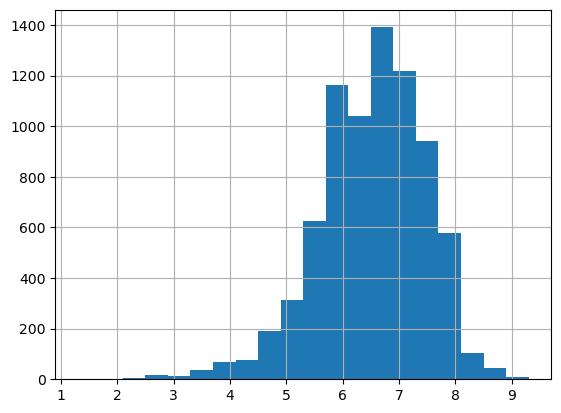

In [15]:
df['Rating'].hist(bins=20)